In [ ]:
import pandas as pd
impo
rt numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SpaceX_Falcon9.csv")

In [ ]:
df.head(10)

,Unnamed: 0,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,0,1,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,1,2,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,2,3,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,3,4,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,4,5,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857
5,5,6,2014-01-06,Falcon 9,3325.0,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857
6,6,7,2014-04-18,Falcon 9,2296.0,ISS,CCSFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857
7,7,8,2014-07-14,Falcon 9,1316.0,LEO,CCSFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857
8,8,9,2014-08-05,Falcon 9,4535.0,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857
9,9,10,2014-09-07,Falcon 9,4428.0,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      90 non-null     int64  
 1   FlightNumber    90 non-null     int64  
 2   Date            90 non-null     object 
 3   BoosterVersion  90 non-null     object 
 4   PayloadMass     85 non-null     float64
 5   Orbit           90 non-null     object 
 6   LaunchSite      90 non-null     object 
 7   Outcome         90 non-null     object 
 8   Flights         90 non-null     int64  
 9   GridFins        90 non-null     bool   
 10  Reused          90 non-null     bool   
 11  Legs            90 non-null     bool   
 12  LandingPad      64 non-null     object 
 13  Block           90 non-null     float64
 14  ReusedCount     90 non-null     int64  
 15  Serial          90 non-null     object 
 16  Longitude       90 non-null     float64
 17  Latitude        90 non-null     float

In [ ]:
df.isnull().sum()/df.count()*100

Unnamed: 0         0.000000
FlightNumber       0.000000
Date               0.000000
BoosterVersion     0.000000
PayloadMass        5.882353
Orbit              0.000000
LaunchSite         0.000000
Outcome            0.000000
Flights            0.000000
GridFins           0.000000
Reused             0.000000
Legs               0.000000
LandingPad        40.625000
Block              0.000000
ReusedCount        0.000000
Serial             0.000000
Longitude          0.000000
Latitude           0.000000
dtype: float64

In [ ]:
df.drop(["LandingPad"],axis=1,inplace=True)

In [ ]:
df.dtypes

Unnamed: 0          int64
FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

In [ ]:
df["LaunchSite"].value_counts()

CCSFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: LaunchSite, dtype: int64

In [ ]:
df["Orbit"].value_counts()

GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: Orbit, dtype: int64

In [ ]:
df["Longitude"].value_counts()

-80.577366     55
-80.603956     22
-120.610829    13
Name: Longitude, dtype: int64

In [ ]:
df["Latitude"].value_counts()

28.561857    55
28.608058    22
34.632093    13
Name: Latitude, dtype: int64

In [ ]:
df["Block"].value_counts()

5.0    39
1.0    19
3.0    15
4.0    11
2.0     6
Name: Block, dtype: int64

In [ ]:
df["ReusedCount"].value_counts()

0     29
1     24
12    11
3      8
9      6
4      4
5      4
2      3
6      1
Name: ReusedCount, dtype: int64

In [ ]:
df["Flights"].value_counts()

1    53
2    19
3     8
4     6
5     2
6     2
Name: Flights, dtype: int64

In [ ]:
landing_outcomes=df["Outcome"].value_counts()
landing_outcomes

True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: Outcome, dtype: int64

In [ ]:
for i,outcome in enumerate(landing_outcomes.keys()):
  print(i,outcome)

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


In [ ]:
bad_outcomes=set(landing_outcomes.keys()[[1,3,5,6,7]])
bad_outcomes

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

In [ ]:
landing_class=[0 if i in set(bad_outcomes) else 1 for i in df["Outcome"]]

In [ ]:
df["class"]=landing_class
df[["class"]].head(8)

,class
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,1


In [ ]:
df["class"].mean()

0.6666666666666666

In [ ]:
df["class"].value_counts

<bound method IndexOpsMixin.value_counts of 0     0
1     0
2     0
3     0
4     0
     ..
85    1
86    1
87    1
88    1
89    1
Name: class, Length: 90, dtype: int64>

In [ ]:
df.isnull().sum()

Unnamed: 0        0
FlightNumber      0
Date              0
BoosterVersion    0
PayloadMass       5
Orbit             0
LaunchSite        0
Outcome           0
Flights           0
GridFins          0
Reused            0
Legs              0
Block             0
ReusedCount       0
Serial            0
Longitude         0
Latitude          0
class             0
dtype: int64

In [ ]:
df1=df.fillna(value=df["PayloadMass"].mean())

In [ ]:
df1.isnull().sum()

Unnamed: 0        0
FlightNumber      0
Date              0
BoosterVersion    0
PayloadMass       0
Orbit             0
LaunchSite        0
Outcome           0
Flights           0
GridFins          0
Reused            0
Legs              0
Block             0
ReusedCount       0
Serial            0
Longitude         0
Latitude          0
class             0
dtype: int64

In [ ]:
df1.head(10)

,Unnamed: 0,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,Block,ReusedCount,Serial,Longitude,Latitude,class
0,0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,1.0,0,B0003,-80.577366,28.561857,0
1,1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,1.0,0,B0005,-80.577366,28.561857,0
2,2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,1.0,0,B0007,-80.577366,28.561857,0
3,3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,1.0,0,B1003,-120.610829,34.632093,0
4,4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,1.0,0,B1004,-80.577366,28.561857,0
5,5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,1.0,0,B1005,-80.577366,28.561857,0
6,6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCSFS SLC 40,True Ocean,1,False,False,True,1.0,0,B1006,-80.577366,28.561857,1
7,7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCSFS SLC 40,True Ocean,1,False,False,True,1.0,0,B1007,-80.577366,28.561857,1
8,8,9,2014-08-05,Falcon 9,4535.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,1.0,0,B1008,-80.577366,28.561857,0
9,9,10,2014-09-07,Falcon 9,4428.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,1.0,0,B1011,-80.577366,28.561857,0


In [ ]:
df1.to_csv("spacex1_eda_data.csv",index=False)

In [ ]:
df1.describe()

,Unnamed: 0,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude,class
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,44.500000,45.500000,6123.547647,1.788889,3.500000,3.133333,-86.366477,29.449963,0.666667
std,26.124701,26.124701,4732.115291,1.213172,1.595288,4.097684,14.149518,2.141306,0.474045
min,0.000000,1.000000,350.000000,1.000000,1.000000,0.000000,-120.610829,28.561857,0.000000
25%,22.250000,23.250000,2510.750000,1.000000,2.000000,0.000000,-80.603956,28.561857,0.000000
50%,44.500000,45.500000,4701.500000,1.000000,4.000000,1.000000,-80.577366,28.561857,1.000000
75%,66.750000,67.750000,8912.750000,2.000000,5.000000,4.000000,-80.577366,28.608058,1.000000
max,89.000000,90.000000,15600.000000,6.000000,5.000000,12.000000,-80.577366,34.632093,1.000000


<Axes: xlabel='LaunchSite', ylabel='count'>

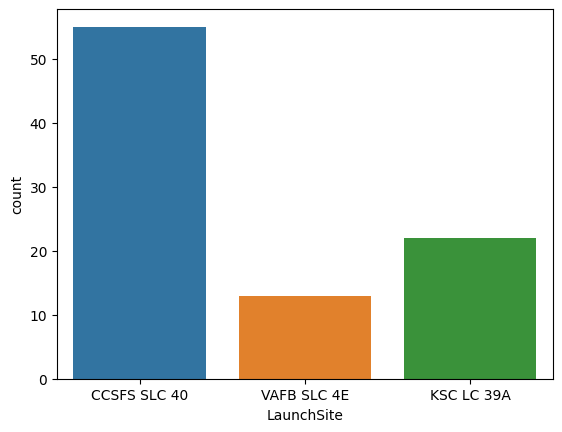

In [ ]:
sns.countplot(x="LaunchSite",data=df1)

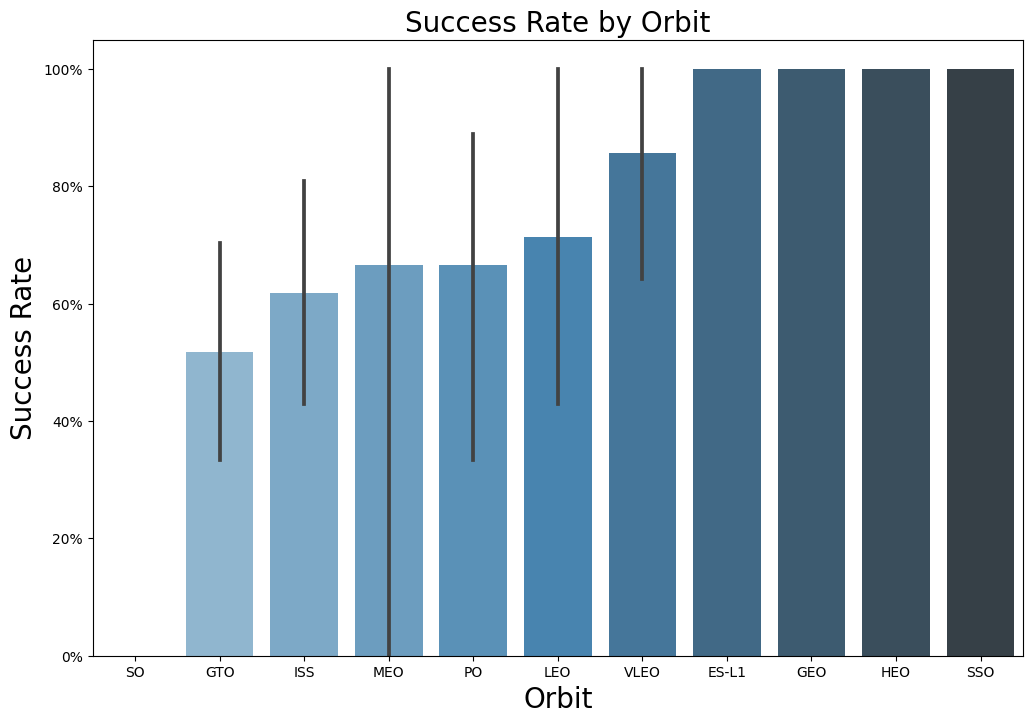

In [ ]:
order=df1.groupby("Orbit").mean()["class"].sort_values().index
fig,ax=plt.subplots()
fig.set_size_inches(12,8)
sns.barplot(x="Orbit",y="class",data=df1,order=order,palette="Blues_d")
plt.xlabel("Orbit",fontsize=20)
plt.ylabel("Success Rate",fontsize=20)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: "{:.0f}%".format(x*100)))
plt.title("Success Rate by Orbit",fontsize=20)
plt.show()

In [ ]:
year=[]
def Extract_year(date):
  for i in df["Date"]:
    year.append(i.split("-")[0])
  return year

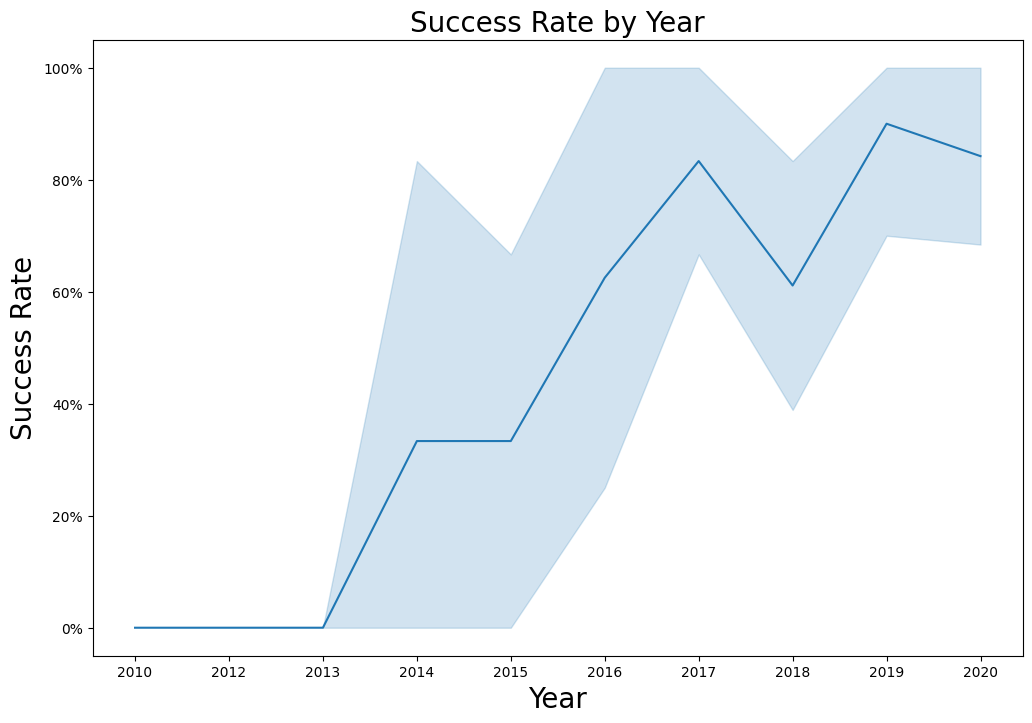

In [ ]:
df1["year"]=Extract_year(df1["Date"])
fig, ax=plt.subplots()
fig.set_size_inches(12,8)
sns.lineplot(x="year",y="class",data=df1)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Success Rate",fontsize=20)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: "{:.0f}%".format(x*100)))
plt.title("Success Rate by Year",fontsize=20)
plt.show()

<Axes: >

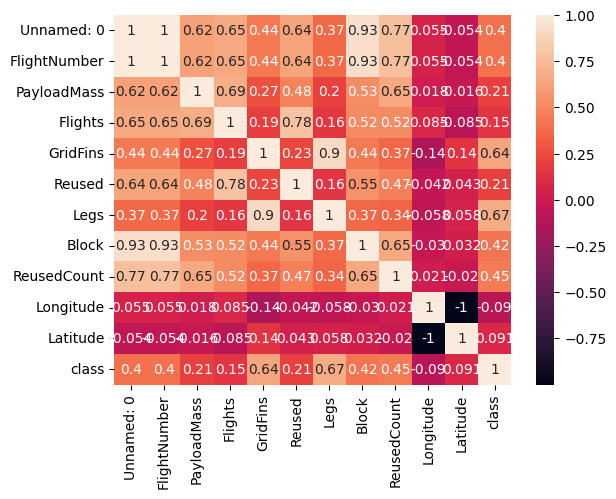

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
x=df1[["PayloadMass","Orbit","LaunchSite","Flights","GridFins","Legs","Block","ReusedCount","Longitude","Latitude"]]
x.head()

,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Legs,Block,ReusedCount,Longitude,Latitude
0,6123.547647,LEO,CCSFS SLC 40,1,False,False,1.0,0,-80.577366,28.561857
1,525.000000,LEO,CCSFS SLC 40,1,False,False,1.0,0,-80.577366,28.561857
2,677.000000,ISS,CCSFS SLC 40,1,False,False,1.0,0,-80.577366,28.561857
3,500.000000,PO,VAFB SLC 4E,1,False,False,1.0,0,-120.610829,34.632093
4,3170.000000,GTO,CCSFS SLC 40,1,False,False,1.0,0,-80.577366,28.561857


In [ ]:
le  =LabelEncoder()

x["Orbit"]=le.fit_transform(x["Orbit"])
x["LaunchSite"]=le.fit_transform(x["LaunchSite"])
x["GridSite"]=le.fit_transform(x["GridFins"])
x["Legs"]=le.fit_transform(x["Legs"])
x["Longitude"]=le.fit_transform(x["Longitude"])
x["Latitude"]=le.fit_transform(x["Latitude"])
x.head()

,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Legs,Block,ReusedCount,Longitude,Latitude,GridSite
0,6123.547647,5,0,1,False,0,1.0,0,2,0,0
1,525.000000,5,0,1,False,0,1.0,0,2,0,0
2,677.000000,4,0,1,False,0,1.0,0,2,0,0
3,500.000000,7,2,1,False,0,1.0,0,0,2,0
4,3170.000000,2,0,1,False,0,1.0,0,2,0,0


In [ ]:
x.astype("float64")

,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Legs,Block,ReusedCount,Longitude,Latitude,GridSite
0,6123.547647,5.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0
1,525.000000,5.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0
2,677.000000,4.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0
3,500.000000,7.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0
4,3170.000000,2.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
85,15600.000000,10.0,1.0,2.0,1.0,1.0,5.0,12.0,1.0,1.0,1.0
86,15600.000000,10.0,1.0,3.0,1.0,1.0,5.0,12.0,1.0,1.0,1.0
87,15600.000000,10.0,1.0,6.0,1.0,1.0,5.0,12.0,1.0,1.0,1.0
88,15600.000000,10.0,0.0,3.0,1.0,1.0,5.0,12.0,2.0,0.0,1.0


In [ ]:
y=df1["class"]
y

0     0
1     0
2     0
3     0
4     0
     ..
85    1
86    1
87    1
88    1
89    1
Name: class, Length: 90, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
Scaler=preprocessing.StandardScaler()
x_train=Scaler.fit_transform(x_train)
x_test=Scaler.transform(x_test)

In [ ]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)

In [ ]:
lr_accuracy=accuracy_score(y_test,lr_pred)
lr_precision=precision_score(y_test,lr_pred)
lr_recall=recall_score(y_test,lr_pred)
lr_f1_score=f1_score(y_test,lr_pred)
lr_auc_score=roc_auc_score(y_test,lr.predict_proba(x_test)[:,1])

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)

In [ ]:
dt_accuracy = accuracy_score (y_test, dt_pred)
dt_precision=precision_score (y_test, dt_pred)
dt_recall=recall_score(y_test, dt_pred)
dt_f1_score=f1_score(y_test, dt_pred)
dt_auc_score=roc_auc_score (y_test, dt.predict_proba (x_test) [:, 1])

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_pred= knn.predict(x_test)
knn_accuracy = accuracy_score (y_test, knn_pred)
knn_precision= precision_score (y_test, knn_pred)
knn_recall = recall_score (y_test, knn_pred)
knn_f1_score=f1_score(y_test,knn_pred)
knn_auc_score = roc_auc_score (y_test, knn.predict_proba (x_test) [:, 1])

In [ ]:
rf=RandomForestClassifier()
rf.fit(x_train, y_train)
rf_pred= rf.predict(x_test)


In [ ]:
rf_accuracy = accuracy_score (y_test, rf_pred)
rf_precision = precision_score (y_test, rf_pred)
rf_recall = recall_score (y_test, rf_pred)
rf_f1_score = f1_score (y_test, rf_pred)
rf_auc_score =roc_auc_score (y_test, rf.predict_proba (x_test) [:, 1])

In [ ]:
y_pred=lr.predict([[500,5,0,1,0,0,1.0,0,2,0,0]])
print(y_pred)

[0]


In [ ]:
metrics=pd.DataFrame({ 'Model': ['Logistic Regression', 'Decision Tree', 'KNN', 'Random Forest'],
'Accuracy': [lr_accuracy, dt_accuracy, knn_accuracy, rf_accuracy],
'AUC Score': [lr_auc_score, dt_auc_score, knn_auc_score, rf_auc_score],
'Precision': [lr_precision, dt_precision, knn_precision, rf_precision],
'Recall': [lr_recall, dt_recall, knn_recall, rf_recall],
'F1 Score' : [lr_f1_score, dt_f1_score, knn_f1_score, rf_f1_score]})

print (metrics)

                 Model  Accuracy  AUC Score  Precision    Recall  F1 Score
0  Logistic Regression  0.944444   1.000000   0.933333  1.000000  0.965517
1        Decision Tree  0.888889   0.839286   0.928571  0.928571  0.928571
2                  KNN  0.888889   0.964286   0.928571  0.928571  0.928571
3        Random Forest  0.944444   1.000000   1.000000  0.928571  0.962963


In [ ]:
import pickle

In [ ]:
filename="model.pkl"
pickle.dump(lr,open(filename,'wb'))